# HW4: K-Means Clustering in Python
# ----
#### Mason Ware
#### COSI 101a, Brandeis University (Spring 2022)

a.) Per the instructions of the assingment, I will be doing k-means clustering in Python to execute clustering on the given data set located at `./hw4.csv`. The k-means algorithm I will be using is the one provided by the sklearn module in python, `KMeans`. 

### CUSTOM CODE

In [1]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

### Necessary Packages:

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets import (make_blobs,
                              make_circles,
                              make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')



### Loading and Reading Data

In [5]:
df = pd.read_csv('data/hw4.csv', header = None)
df = df.T

sample_arrays = {}

#make a dict of sample runs to 2d arrays of their results
for i in range(4999):
    array_1d = np.array(list(df[i]))
    array_2d = np.reshape(array_1d[:94], (47,2))
    sample_arrays[i] = array_2d

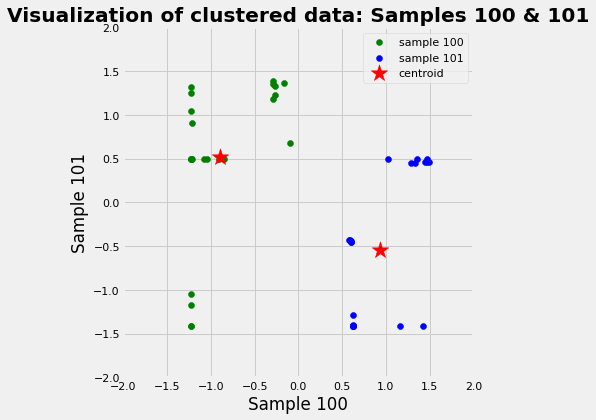

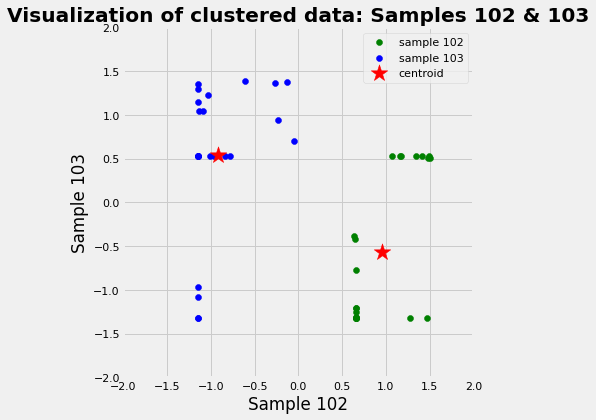

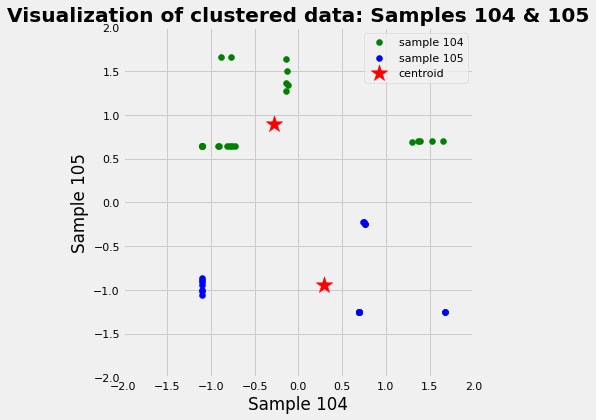

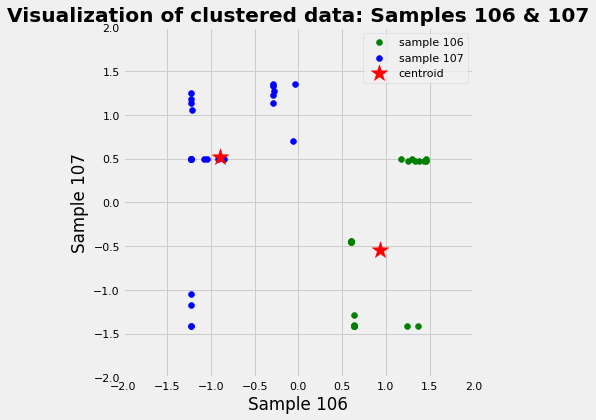

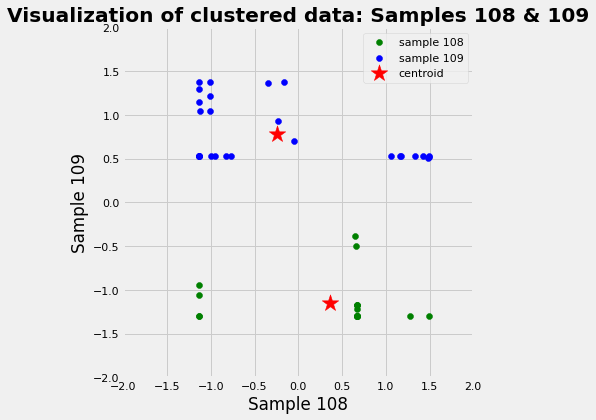

In [8]:
for i in range(100, 110, 2):
    X_std = StandardScaler().fit_transform(sample_arrays[i])

    # Run local implementation of kmeans
    km = Kmeans(n_clusters=2, max_iter=100)
    km.fit(X_std)
    centroids = km.centroids

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
                c='green', label=f'sample {i}')
    plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
                c='blue', label=f'sample {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
                c='r', label='centroid')

    plt.legend()
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel(f'Sample {i}')
    plt.ylabel(f'Sample {i+1}')
    plt.title(f'Visualization of clustered data: Samples {i} & {i+1}', fontweight='bold')
    ax.set_aspect('equal');